<h1> Britador </h1>

<p>
Seis caminhões de carga são usados para transportar pedras britadas, desde um terminal de cargas até o leito de uma estrada em construção. Cada caminhão é carregado por uma de duas máquinas de carga. Depois de carregados, eles devem ser imediatamente pesados numa balança, logo à frente do terminal de carga. Existe uma fila à frente do setor de cargas e outra à frente da balança. Após ser pesado, o caminhão segue para uma pequena viagem até a estrada onde, após descarregar, volta ao terminal de carga.
</p>

<p>
As distribuições para os tempos de carga, pesagem e viagem/descarga são apresentadas no anexo.
</p>

<p>
O propósito do exercício é realizar uma simulação manual com controle de eventos (semelhante à tabela 2.11) para estimar a utilização dos carregadores e da balança, além de algumas estatísticas de filas.
</p>

<p>
Suponha que no tempo 0, cinco caminhões estejam nos carregadores (dois carregando e três na fila) e um na balança.
</p>

<p>
Simule manualmente este sistema até que um dos caminhões volte a fila de carregamento. Após a simulação responda:
</p>

<p>
Qual a taxa de ocupação dos recursos?
</p>

<p>
Qual o tempo médio dos caminhões na fila de carregamento? E na de pesagem? Qual o tempo máximo que um caminhão ficou na fila de pesagem?
</p>

<p>
<i>Exercício 4, capítulo 2. Freitas Filho, P. F. Introdução a modelagem e Simulação de sistemas. Visual Books – 2008.</i>
</p>

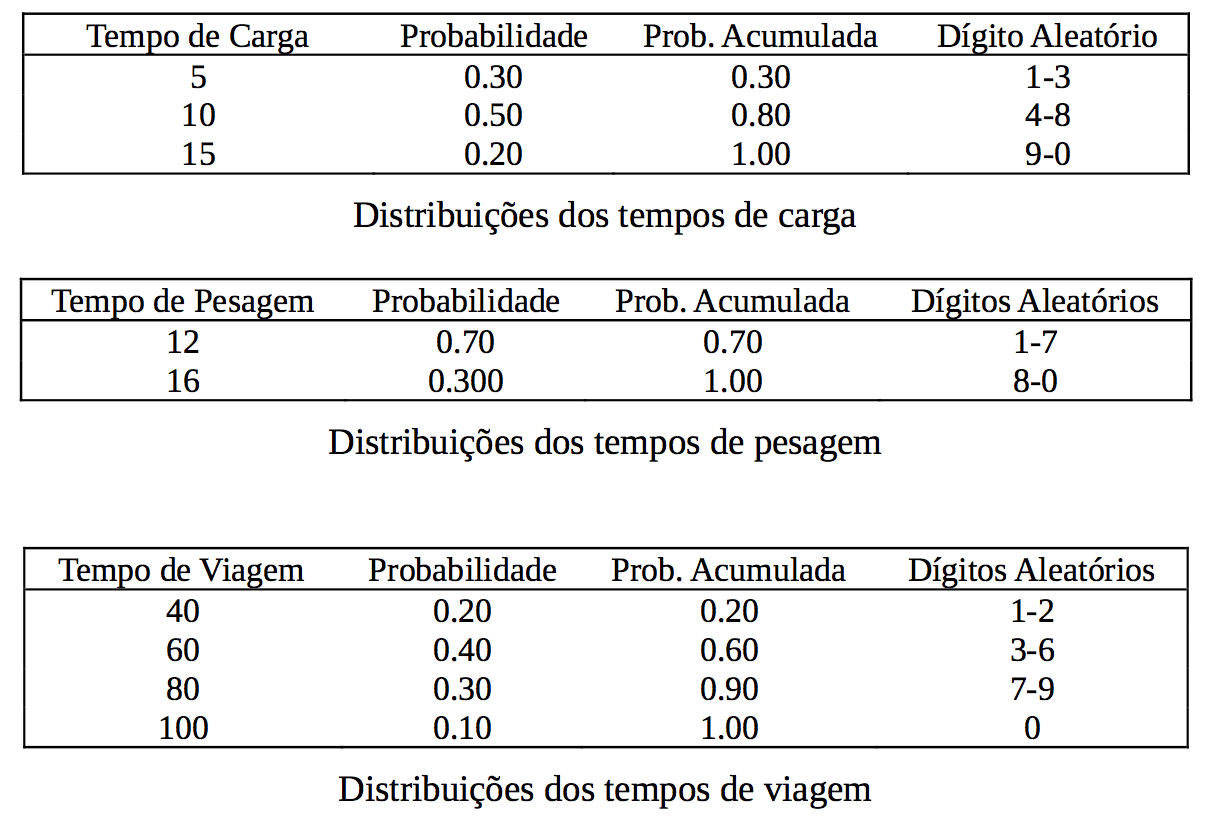

In [9]:
tempo_carga = {
    "Tempo de Carga": [5, 10, 15], 
    "Probabilidade": [0.30, 0.50, 0.20], 
    "Prob. Acumulada": [0.30, 0.80, 1.00],
    "Dígito Aleatórios": [[0, 2], [3, 7], [8, 9]]
}

In [10]:
tempo_pesagem = {
    "Tempo de Pesagem": [12, 16], 
    "Probabilidade": [0.70, 0.30], 
    "Prob. Acumulada": [0.70, 1.00],
    "Dígito Aleatórios": [[0, 6], [7, 9]]
}

In [11]:
tempo_viagem = {
    "Tempo de Viagem": [40, 60, 80, 100], 
    "Probabilidade": [0.20, 0.40, 0.30, 0.10], 
    "Prob. Acumulada": [0.20, 0.60, 0.90, 1.00],
    "Dígito Aleatórios": [[0, 1], [2, 5], [6, 8], [9, 9]]
}

In [21]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [22]:
def get_interval(df, f, f2, r):
    for i in range(len(df[f])):
        if(df[f][i][0] <= r and df[f][i][1] >= r):
            return df[f2][i]

In [23]:
get_interval(df_tempo_carga, "Dígito Aleatórios", "Tempo de Carga", 5)

10

In [24]:
df_tempo_carga = pd.DataFrame(data=tempo_carga)
df_tempo_carga.set_index('Prob. Acumulada')

,Dígito Aleatórios,Probabilidade,Tempo de Carga
Prob. Acumulada,,,
0.3,"[0, 2]",0.3,5
0.8,"[3, 7]",0.5,10
1.0,"[8, 9]",0.2,15


In [25]:
df_tempo_pesagem = pd.DataFrame(data=tempo_pesagem)
df_tempo_pesagem.set_index('Prob. Acumulada')

,Dígito Aleatórios,Probabilidade,Tempo de Pesagem
Prob. Acumulada,,,
0.7,"[0, 6]",0.7,12
1.0,"[7, 9]",0.3,16


In [26]:
df_tempo_viagem = pd.DataFrame(data=tempo_viagem)
df_tempo_viagem.set_index('Prob. Acumulada')

,Dígito Aleatórios,Probabilidade,Tempo de Viagem
Prob. Acumulada,,,
0.2,"[0, 1]",0.2,40
0.6,"[2, 5]",0.4,60
0.9,"[6, 8]",0.3,80
1.0,"[9, 9]",0.1,100


In [27]:
#caminhao 6 // balança -> viagem
r = random.randint(0, 9)
tp = get_interval(df_tempo_pesagem, "Dígito Aleatórios", "Tempo de Pesagem", r)
    
print("Caminhão {}: {}".format(6, tp))

Caminhão 6: 12


In [28]:
#caminhao 4-5 // carga -> balança fila 
anterior = []
for i in range(3, 5):
    r = random.randint(0, 9)
    t = get_interval(df_tempo_carga, "Dígito Aleatórios", "Tempo de Carga", r)
    
    ta = ""
    for a in anterior:
        ta += " + "+str(a)
        
    total = sum(anterior) + t + tp
    anterior.append(t)
    
    print("Caminhão {}: {}{} + {} = {}".format(i+1, tp, ta, t, total))

Caminhão 4: 12 + 15 = 27
Caminhão 5: 12 + 15 + 15 = 42


In [29]:
#caminhao 1-2 // carga_fila -> carga
for i in range(0, 2):
    
    ta = ""
    for a in anterior[:i]:
        ta += " + "+str(a)
    
    total = sum(anterior[:i]) + t + tp
    
    print("Caminhão {}: {}{} + {} = {}".format(i+1, tp, ta, t, total))

Caminhão 1: 12 + 15 = 27
Caminhão 2: 12 + 15 + 15 = 42


In [30]:
#caminhao 6 // viagem -> carga_fila
r = random.randint(0, 4)
t = get_interval(df_tempo_viagem, "Dígito Aleatórios", "Tempo de Viagem", r)
    
print("Caminhão {}: {}".format(6, t))

Caminhão 6: 40


In [31]:
# Tempo médio de carregamento:
med_carregamento_list = []
num_simulacoes = 100000
for i in range(num_simulacoes):
    r = random.randint(0, 9)
    med_carregamento_list.append(get_interval(df_tempo_carga, "Dígito Aleatórios", "Tempo de Carga", r))

med_carregamento = np.sum(med_carregamento_list)/num_simulacoes

print("Tempo médio de carregamento: {} minutos".format(med_carregamento))

Tempo médio de carregamento: 9.495 minutos


In [38]:
# Tempo médio de pesagem:
med_pesagem_list = []
num_simulacoes = 100000
for i in range(num_simulacoes):
    r = random.randint(0, 9)
    med_pesagem_list.append(get_interval(df_tempo_pesagem, "Dígito Aleatórios", "Tempo de Pesagem", r))

med_pesagem = np.sum(med_pesagem_list)/num_simulacoes

print("Tempo médio de carregamento: {} minutos".format(med_pesagem))

Tempo médio de carregamento: 13.19968 minutos
